In [408]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda
import matplotlib.pyplot as plt

In [409]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [410]:
train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

In [411]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x).cuda()
        logits = self.linear_relu_stack(x).cuda()
        return logits.cuda()

model = NeuralNetwork().cuda()

In [412]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [413]:
loss_fn = nn.CrossEntropyLoss()

In [414]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [415]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        loss = loss_fn(pred.cuda(), y.cuda())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [416]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred.cuda(), y.cuda()).item()
            correct += (pred.argmax(1) == y.cuda()).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [417]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 20
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.296003  [    0/60000]
loss: 2.291049  [ 6400/60000]
loss: 2.260320  [12800/60000]
loss: 2.256715  [19200/60000]
loss: 2.240220  [25600/60000]
loss: 2.206614  [32000/60000]
loss: 2.221170  [38400/60000]
loss: 2.183606  [44800/60000]
loss: 2.180608  [51200/60000]
loss: 2.153793  [57600/60000]
Test Error: 
 Accuracy: 46.5%, Avg loss: 2.141946 

Epoch 2
-------------------------------
loss: 2.154417  [    0/60000]
loss: 2.150961  [ 6400/60000]
loss: 2.080471  [12800/60000]
loss: 2.096832  [19200/60000]
loss: 2.051881  [25600/60000]
loss: 1.988469  [32000/60000]
loss: 2.019925  [38400/60000]
loss: 1.938097  [44800/60000]
loss: 1.941316  [51200/60000]
loss: 1.883313  [57600/60000]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.866847 

Epoch 3
-------------------------------
loss: 1.899883  [    0/60000]
loss: 1.879504  [ 6400/60000]
loss: 1.744996  [12800/60000]
loss: 1.788941  [19200/60000]
loss: 1.688334  [25600/60000]
loss: 1.636998  [32000/600

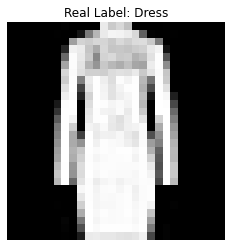

AI guess: Dress


In [454]:
labels_map={0:"T-Shirt",
            1: "Trouser",
            2: "Pullover",
            3: "Dress",
            4: "Coat",
            5: "Sandal",
            6: "Shirt",
            7: "Sneaker",
            8: "Bag",
            9: "Ankle Boot"}
sample_idx=torch.randint(len(training_data),size=(1,)).item()
figure=plt.figure(figsize=(4,4))
img,label=training_data[sample_idx]
figure.add_subplot()
plt.title("Real Label: "+labels_map[label])
plt.axis("off")
plt.imshow(img.squeeze(),cmap="gray")
plt.show()

x,y=training_data[sample_idx]
pred=model(x)

maks=-100
index=-1
for i in range(len(pred[0])):
    if pred[0][i]>maks:
        maks=pred[0][i]
        index=i
print("AI guess: "+labels_map[index])